In [1]:
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.modeling import models
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table
import astropy.constants as c
from extinction import apply
import extinction

In [2]:
hdul_770 = fits.open('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f770w_i2d.fits')
hdul_1280 = fits.open('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f1280w_i2d.fits')
hdul_2550 = fits.open('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f2550w_i2d.fits')

data_770 = hdul_770['SCI'].data
data_1280 = hdul_1280['SCI'].data
data_2550 = hdul_2550['SCI'].data

min_2550 = 1000*u.MJy/u.sr #MJy/sr
min_1280 = 80*u.MJy/u.sr# MJy/sr
min_770 = 49*u.MJy/u.sr# MJy/sr

pixel_area_770 = (hdul_770['SCI'].header['CDELT1'] * u.deg)**2
pixel_area_1280 = (hdul_1280['SCI'].header['CDELT1'] * u.deg)**2
pixel_area_2550 = (hdul_2550['SCI'].header['CDELT1'] * u.deg)**2

lower_limit_770 = (min_770 * pixel_area_770).to(u.Jy)
lower_limit_1280 = (min_1280 * pixel_area_1280).to(u.Jy)
lower_limit_2550 = (min_2550 * pixel_area_2550).to(u.Jy)

In [152]:
hdul_360 = fits.open('/orange/adamginsburg/jwst/sgrb2/NB/current_fits/f360m.fits')
pixel_area_360 = (hdul_360['SCI'].header['CDELT1'] * u.deg)**2
hdul_410 = fits.open('/orange/adamginsburg/jwst/sgrb2/NB/current_fits/f410m.fits')
pixel_area_410 = (hdul_410['SCI'].header['CDELT1'] * u.deg)**2

In [3]:
cat = Table.read('/orange/adamginsburg/jwst/sgrb2/NB/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.fits')

In [4]:
cat11 = Table.read('/orange/adamginsburg/jwst/sgrb2/NB/crowdsource_nsky0_merged_photometry_tables_merged_11matches.fits')

In [5]:
def get_band_names(cat):
    return [colname[-5:] for colname in cat.colnames if colname.startswith('qf_')]

In [6]:
nircam_lower_limits = []
for band in get_band_names(cat11):
    nircam_lower_limits.append(np.nanmin(cat11[f'flux_jy_{band}']))

In [7]:
nircam_lower_limits

[4.311222e-09,
 7.899084e-08,
 3.0403917e-09,
 9.905606e-09,
 2.7956444e-09,
 6.1431593e-09,
 3.4602483e-09,
 2.8729408e-09,
 3.539389e-09,
 9.852065e-10,
 4.2127704e-11]

In [8]:
jwst_lower_limits_jy = nircam_lower_limits + [lower_limit_770.value, lower_limit_1280.value, lower_limit_2550.value]

In [9]:
jwst_lower_limits_jy

[4.311222e-09,
 7.899084e-08,
 3.0403917e-09,
 9.905606e-09,
 2.7956444e-09,
 6.1431593e-09,
 3.4602483e-09,
 2.8729408e-09,
 3.539389e-09,
 9.852065e-10,
 4.2127704e-11,
 1.4166045790465567e-05,
 2.3128237944048497e-05,
 0.0002891029735624511]

In [10]:
cat770 = Table.read('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f770w_cat.fits')
cat1280 = Table.read('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f1280w_cat.fits')
cat2550 = Table.read('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f2550w_cat.fits')    

In [11]:
# I need to fix the MIRI offset in the MIRI catalogs:
# ra_shift_arcsec = 0.09
# dec_shift_arcsec = 0.085


# dec_shift_deg = dec_shift_arcsec / 3600.0
# ra_shift_deg = (ra_shift_arcsec / 3600.0) / np.cos(np.deg2rad(combined['sky_centroid770'].dec.deg))

In [12]:
# Sgr B2 Z10.24 (HII region). Has C-band detection
src = cat[cat['id_f480m'] == 52160][0]

In [13]:
src

skycoord_ref,skycoord_ref_filtername,sep_f480m,id_f480m,skycoord_f480m,x_f480m,y_f480m,flux_f480m,passno_f480m,dx_f480m,dy_f480m,dflux_f480m,qf_f480m,rchi2_f480m,fracflux_f480m,fluxlbs_f480m,dfluxlbs_f480m,fwhm_f480m,spread_model_f480m,dspread_model_f480m,fluxiso_f480m,xiso_f480m,yiso_f480m,flags_f480m,sky_f480m,mask_f480m,dra_f480m,ddec_f480m,flux_jy_f480m,eflux_jy_f480m,mag_ab_f480m,emag_ab_f480m,near_saturated_f480m_f480m,replaced_saturated_f480m,sep_f466n,id_f466n,skycoord_f466n,x_f466n,y_f466n,flux_f466n,passno_f466n,dx_f466n,dy_f466n,dflux_f466n,qf_f466n,rchi2_f466n,fracflux_f466n,fluxlbs_f466n,dfluxlbs_f466n,fwhm_f466n,spread_model_f466n,dspread_model_f466n,fluxiso_f466n,xiso_f466n,yiso_f466n,flags_f466n,sky_f466n,mask_f466n,dra_f466n,ddec_f466n,flux_jy_f466n,eflux_jy_f466n,mag_ab_f466n,emag_ab_f466n,near_saturated_f466n_f466n,replaced_saturated_f466n,sep_f410m,id_f410m,skycoord_f410m,x_f410m,y_f410m,flux_f410m,passno_f410m,dx_f410m,dy_f410m,dflux_f410m,qf_f410m,rchi2_f410m,fracflux_f410m,fluxlbs_f410m,dfluxlbs_f410m,fwhm_f410m,spread_model_f410m,dspread_model_f410m,fluxiso_f410m,xiso_f410m,yiso_f410m,flags_f410m,sky_f410m,mask_f410m,dra_f410m,ddec_f410m,flux_jy_f410m,eflux_jy_f410m,mag_ab_f410m,emag_ab_f410m,near_saturated_f410m_f410m,replaced_saturated_f410m,sep_f405n,id_f405n,skycoord_f405n,x_f405n,y_f405n,flux_f405n,passno_f405n,dx_f405n,dy_f405n,dflux_f405n,qf_f405n,rchi2_f405n,fracflux_f405n,fluxlbs_f405n,dfluxlbs_f405n,fwhm_f405n,spread_model_f405n,dspread_model_f405n,fluxiso_f405n,xiso_f405n,yiso_f405n,flags_f405n,sky_f405n,mask_f405n,dra_f405n,ddec_f405n,flux_jy_f405n,eflux_jy_f405n,mag_ab_f405n,emag_ab_f405n,near_saturated_f405n_f405n,replaced_saturated_f405n,sep_f360m,id_f360m,skycoord_f360m,x_f360m,y_f360m,flux_f360m,passno_f360m,dx_f360m,dy_f360m,dflux_f360m,qf_f360m,rchi2_f360m,fracflux_f360m,fluxlbs_f360m,dfluxlbs_f360m,fwhm_f360m,spread_model_f360m,dspread_model_f360m,fluxiso_f360m,xiso_f360m,yiso_f360m,flags_f360m,sky_f360m,mask_f360m,dra_f360m,ddec_f360m,flux_jy_f360m,eflux_jy_f360m,mag_ab_f360m,emag_ab_f360m,near_saturated_f360m_f360m,replaced_saturated_f360m,sep_f300m,id_f300m,skycoord_f300m,x_f300m,y_f300m,flux_f300m,passno_f300m,dx_f300m,dy_f300m,dflux_f300m,qf_f300m,rchi2_f300m,fracflux_f300m,fluxlbs_f300m,dfluxlbs_f300m,fwhm_f300m,spread_model_f300m,dspread_model_f300m,fluxiso_f300m,xiso_f300m,yiso_f300m,flags_f300m,sky_f300m,mask_f300m,dra_f300m,ddec_f300m,flux_jy_f300m,eflux_jy_f300m,mag_ab_f300m,emag_ab_f300m,near_saturated_f300m_f300m,replaced_saturated_f300m,sep_f212n,id_f212n,skycoord_f212n,x_f212n,y_f212n,flux_f212n,passno_f212n,dx_f212n,dy_f212n,dflux_f212n,qf_f212n,rchi2_f212n,fracflux_f212n,fluxlbs_f212n,dfluxlbs_f212n,fwhm_f212n,spread_model_f212n,dspread_model_f212n,fluxiso_f212n,xiso_f212n,yiso_f212n,flags_f212n,sky_f212n,mask_f212n,dra_f212n,ddec_f212n,flux_jy_f212n,eflux_jy_f212n,mag_ab_f212n,emag_ab_f212n,near_saturated_f212n_f212n,replaced_saturated_f212n,sep_f210m,id_f210m,skycoord_f210m,x_f210m,y_f210m,flux_f210m,passno_f210m,dx_f210m,dy_f210m,dflux_f210m,qf_f210m,rchi2_f210m,fracflux_f210m,fluxlbs_f210m,dfluxlbs_f210m,fwhm_f210m,spread_model_f210m,dspread_model_f210m,fluxiso_f210m,xiso_f210m,yiso_f210m,flags_f210m,sky_f210m,mask_f210m,dra_f210m,ddec_f210m,flux_jy_f210m,eflux_jy_f210m,mag_ab_f210m,emag_ab_f210m,near_saturated_f210m_f210m,replaced_saturated_f210m,sep_f187n,id_f187n,skycoord_f187n,x_f187n,y_f187n,flux_f187n,passno_f187n,dx_f187n,dy_f187n,dflux_f187n,qf_f187n,rchi2_f187n,fracflux_f187n,fluxlbs_f187n,dfluxlbs_f187n,fwhm_f187n,spread_model_f187n,dspread_model_f187n,fluxiso_f187n,xiso_f187n,yiso_f187n,flags_f187n,sky_f187n,mask_f187n,dra_f187n,ddec_f187n,flux_jy_f187n,eflux_jy_f187n,mag_ab_f187n,emag_ab_f187n,near_saturated_f187n_f187n,replaced_saturated_f187n,sep_f182m,id_f182m,skycoord_f182m,x_f182m,y_f182m,flux_f182m,passno_f182m,dx_f182m,dy_f182m,dflux_f182m,qf_f182m,rchi2_f182m,fracflux_f182m,fluxlbs_f182m,dfluxlbs_f182m,fwhm_f182m,spread_model_f182m,dspread_mod

In [14]:
round(cat1280[0]['xcentroid'])

879

In [15]:
def cross_match_with_src(src):
    src_coord = src['skycoord_ref']

    flux770 = np.ma.masked
    flux1280 = np.ma.masked
    flux2550 = np.ma.masked

    upper_limit_770 = np.ma.masked
    upper_limit_1280 = np.ma.masked
    upper_limit_2550 = np.ma.masked

    cat770_coords = cat770['sky_centroid']
    idx, sep2d, _ = src_coord.match_to_catalog_sky(cat770_coords)
    if sep2d.arcsec < 0.3:
        flux770 = cat770['aper_total_flux'][idx]
    else:
        print('No match in F770W catalog for source', src['id_f480m'])
    
    cat1280_coords = cat1280['sky_centroid']
    idx, sep2d, _ = src_coord.match_to_catalog_sky(cat1280_coords)
    if sep2d.arcsec < 0.5:
        flux1280 = cat1280['aper_total_flux'][idx]
    else:
        print('No match in F1280W catalog for source', src['id_f480m'])
        # this is wrong, need to take nircam coordinates, fix MIRI offset, comvert to pixels.
        #x = round(cat1280['xcentroid'][idx])
        #y = round(cat1280['ycentroid'][idx])
        
        #upper_limit_1280 = (data_1280[y, x] * u.MJy/u.sr * pixel_area_1280).to(u.Jy).value

    cat2550_coords = cat2550['sky_centroid']
    idx, sep2d, _ = src_coord.match_to_catalog_sky(cat2550_coords)
    if sep2d.arcsec < 0.5:
        flux2550 = cat2550['aper_total_flux'][idx]
    else:
        print('No match in F2550W catalog for source', src['id_f480m'])

    return [flux770, flux1280, flux2550], [upper_limit_770, upper_limit_1280, upper_limit_2550]

In [16]:
cross_match_with_src(src)

No match in F1280W catalog for source 52160


([0.0004166358144720555, masked, 0.024539890668358065],
 [masked, masked, masked])

In [115]:
wavelengths = [
1.50,
1.82,
1.87,
2.10,
2.12,
3.00,
3.60,
4.05,
4.10,
4.66,
4.80, 
7.70,
12.80,
25.50
]

In [116]:
# add nircam upper limits at some point.
def get_jy(cat):
    #return ([cat[f'flux_jy_{band}'].value[0] for band in get_band_names(cat)][::-1])
    nircam_fluxes = ([cat[f'flux_jy_{band}'] for band in get_band_names(cat)][::-1])
    nircam_upper_limits = [np.ma.masked] * len(nircam_fluxes)
    miri_fluxes = cross_match_with_src(cat)[0]
    miri_upper_limits = cross_match_with_src(cat)[1]
    nircam_fluxes += miri_fluxes
    jwst_upperlimits = nircam_upper_limits + miri_upper_limits

    return nircam_fluxes, jwst_upperlimits

In [117]:
get_jy(src)

No match in F1280W catalog for source 52160
No match in F1280W catalog for source 52160


([masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  0.00018061763,
  0.0004166358144720555,
  masked,
  0.024539890668358065],
 [masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked])

In [118]:
def wav_to_freq(wavelength):
    return (c.c / (wavelength * u.um)).to(u.Hz)

def freq_to_wav(freq):
    return (c.c / freq).to(u.um)

In [119]:
get_jy(src)[0]

No match in F1280W catalog for source 52160
No match in F1280W catalog for source 52160


[masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 0.00018061763,
 0.0004166358144720555,
 masked,
 0.024539890668358065]

In [120]:
freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

miri_1280_hardcoded_upper = (8.535776519775e+1*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src)[1]
jy_upper_limits[-2] = miri_1280_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

No match in F1280W catalog for source 52160
No match in F1280W catalog for source 52160
No match in F1280W catalog for source 52160
No match in F1280W catalog for source 52160


/blue/adamginsburg/nbudaiev/python_env/JWST_SgrB2/lib/python3.12/site-packages/astropy/units/quantity.py:544: UserWarning: Warning: converting a masked element to nan.
  value = np.array(


In [121]:
jwst_lower_limits_nuFnu = (jwst_lower_limits_jy * u.Jy * wav_to_freq(wavelengths)).to(u.erg/u.s/u.cm**2)

In [122]:
wavelength = np.logspace(0, 5, 200)
#nu = 3e14 / wavelength  # Frequency in Hz (approx conversion: c / lambda)
#S_ff = nu**(-0.1)  
freq = wav_to_freq(wavelength)
ff_S_nu = (freq / freq[0])**(-0.1) * u.erg / u.s / u.cm**2 / u.Hz
ff_nuFnu = (freq * ff_S_nu).to(u.erg / u.s / u.cm**2)


In [123]:
wav_to_freq(wavelength)**(-0.1)

<Quantity [0.03567122, 0.03587819, 0.03608636, 0.03629574, 0.03650633,
           0.03671815, 0.03693119, 0.03714547, 0.03736099, 0.03757777,
           0.0377958 , 0.0380151 , 0.03823567, 0.03845752, 0.03868065,
           0.03890509, 0.03913082, 0.03935786, 0.03958622, 0.03981591,
           0.04004693, 0.04027928, 0.04051299, 0.04074805, 0.04098448,
           0.04122228, 0.04146146, 0.04170202, 0.04194398, 0.04218735,
           0.04243213, 0.04267833, 0.04292595, 0.04317502, 0.04342552,
           0.04367749, 0.04393091, 0.0441858 , 0.04444218, 0.04470004,
           0.04495939, 0.04522025, 0.04548263, 0.04574653, 0.04601196,
           0.04627892, 0.04654744, 0.04681752, 0.04708916, 0.04736238,
           0.04763718, 0.04791358, 0.04819158, 0.0484712 , 0.04875244,
           0.04903531, 0.04931982, 0.04960598, 0.0498938 , 0.05018329,
           0.05047446, 0.05076732, 0.05106188, 0.05135815, 0.05165614,
           0.05195586, 0.05225731, 0.05256052, 0.05286548, 0.05317222,
      

In [124]:
h = c.h  # Planck's constant (J s)
k = c.k_B # Boltzmann constant (J/K)
T_d = 200 * u.K      # Dust temperature in K
beta = 1.75     # Dust emissivity index
B_lambda = (2*h*c.c**2 / (wavelength*u.um)**5) / (np.exp(h*c.c / (wavelength*u.um* k * T_d) ) - 1)
S_dust = B_lambda * (wavelength)**beta


In [125]:
# 3 mm 	2.652939222753e-2
# 6 GHZ 3.352606436238e-3 Jy/beam

#nuFnu_92ghz = (2.652939222753e-2*u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_92ghz = (5e-2*u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_6ghz = (3.352606436238e-3*u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)


In [126]:
nuFnu_upper_limits

<Quantity [           nan,            nan,            nan,            nan,
                      nan,            nan,            nan,            nan,
                      nan,            nan,            nan,            nan,
           5.77971374e-15,            nan] erg / (s cm2)>

In [127]:
wav_to_freq([2,3])

<Quantity [1.49896229e+14, 9.99308193e+13] Hz>

In [128]:
def thick_bb_emission(T, freq, radii):
    B_nu = (2 * freq**3 *c.h / (c.c**2) * 1 / (np.e**(c.h*freq/(c.k_B*T))-1)).to(u.W/u.m**2/u.Hz)
    d = 8.277 * u.kpc
    S_nu = B_nu * np.pi * radii**2 / d**2 
    
    nuFnu = (S_nu * freq).to(u.erg/u.s/u.cm**2)
    return nuFnu
    #return S_nu.to(u.Jy)

In [129]:
S_dust = thick_bb_emission(100*u.K, wav_to_freq(wavelength), 100*u.AU)

Text(0.5, 0, 'Wavelength (microns)')

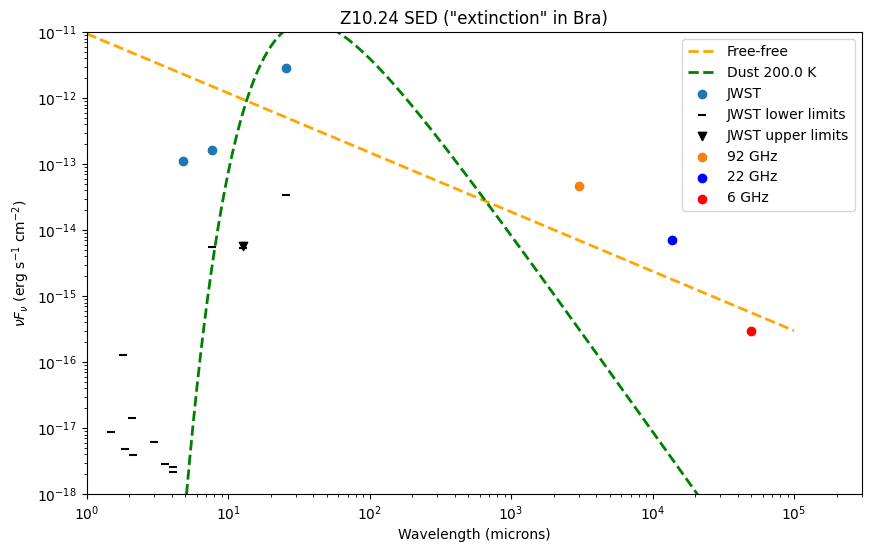

In [130]:
# 480 contamination from extended emission
# Meng region 44
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, ff_nuFnu*10**(-25.5), label=f"Free-free", color='orange', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')


plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz')
plt.scatter(freq_to_wav(22*u.GHz), (32.2*u.mJy * 22*u.GHz).to(u.erg/u.s/u.cm**2).value, label='22 GHz', color='blue')
plt.scatter(freq_to_wav(6*u.GHz), (5*u.mJy * 6*u.GHz).to(u.erg/u.s/u.cm**2).value, label='6 GHz', color='red')

#plt.scatter(freq_to_wav(96*u.GHz), (79*u.mJy * 96*u.GHz).to(u.erg/u.s/u.cm**2).value, label='96 GHz', color='orange')
#plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz')


plt.title('Z10.24 SED ("extinction" in Bra)')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [74]:
B3_cat = Table.read('/home/nbudaiev/orange_link/sgrb2/NB/fits_archive/SgrB2_ALMA_catalog/B3_cat.fits')

In [75]:
B3_cat[B3_cat['ID'] == 335]

ID,"$S_{\nu,flux}$","$S_{\nu,peak}$","$S_{\nu,",FWHM$_{maj}$,FWHM$_{min}$,RA,Dec,Score,Source,G18,ID$_{Band,$T_B$,$\alpha$,$\alpha_{err}$,Mass
,mJy,mJy / beam,mJy / beam,arcsec,arcsec,,,,,,,K,,,solMass
int64,float64,float64,float64,float64,float64,float64,float64,int64,bytes8,bytes11,int64,int64,float64,float64,float64
335,48.87,24.27,0.033,0.135,0.113,266.83349000000004,-28.378140000000002,0,HII,96_Z10.24,--,49,--,--,--


In [76]:
ls /home/nbudaiev/orange_link/sgrb2/NB/fits_archive/SgrB2_ALMA_catalog

B3_cat.fits  catB6_m.reg             datafile4a.txt  datafile4d.txt
B6_cat.fits  cat_HII_candidates.reg  datafile4b.txt  ReadMe_Table4.txt
catB3_m.reg  cat_HII.reg             datafile4c.txt


In [77]:
thick_bb_emission(200*u.K, wav_to_freq(25.5), 100*u.AU)

<Quantity 1.92210774e-10 erg / (s cm2)>

In [78]:
thick_bb_emission(200*u.K, wav_to_freq(4.8), 100*u.AU)

<Quantity 7.4925969e-13 erg / (s cm2)>

In [79]:
def get_SI(flux1, flux2, freq1, freq2):
    
    freq1 = (freq1.to(u.Hz)).value
    freq2 = (freq2.to(u.Hz)).value
    one = (np.log((flux1).value)-np.log((flux2).value))
    two = (np.log(freq1)-np.log(freq2))
    SI = one/two
    
    return SI

In [80]:
get_SI(5e-2*u.Jy, 5e-3*u.Jy, 92*u.GHz, 6*u.GHz)

0.8434287701906185

In [134]:
src2 = cat[(cat['id_f480m'] == 310817) & (cat['id_f405n'] == 40809)][0]
src2 = cat[(cat['id_f480m'] == 182594) & (cat['id_f405n'] == 223050)][0]



cross_match_with_src(src2)

No match in F1280W catalog for source 182594


([0.0010894201827629743, masked, 0.012093290379911671],
 [masked, masked, masked])

In [135]:
freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src2)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

miri_1280_hardcoded_upper = (8.610597991943e+1*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src2)[1]
jy_upper_limits[-2] = miri_1280_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

No match in F1280W catalog for source 182594
No match in F1280W catalog for source 182594
No match in F1280W catalog for source 182594
No match in F1280W catalog for source 182594


In [187]:
nuFnu_92ghz = (1.15e-2*u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
#nuFnu_6ghz = (6.4e-3*u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)

In [188]:
import numpy as np
import astropy.units as u
#from astropy.constants import c, h, k_B
import matplotlib.pyplot as plt

def freefree_nuFnu(nu, Te, ne, radius, distance, Z=1.0):
    """
    Estimate free-free flux density and nuFnu for a spherical HII region.
    
    Parameters
    ----------
    nu : Quantity array
        Frequency array with units (e.g., np.logspace(9,11,200)*u.Hz)
    Te : Quantity
        Electron temperature (e.g., 8000*u.K)
    ne : Quantity
        Electron density (e.g., 1e4*u.cm**-3)
    radius : Quantity
        Physical radius of the HII region (e.g., 0.05*u.pc or 100*u.AU)
    distance : Quantity
        Distance to source (e.g., 8.3*u.kpc)
    Z : float
        Ion charge (1.0 for H)
    
    Returns
    -------
    S_nu : Quantity
        Flux density vs frequency (erg / s / cm^2 / Hz)
    nuFnu : Quantity
        nu * S_nu (erg / s / cm^2)
    tau_nu : ndarray (dimensionless)
        Optical depth at each frequency
    """
    # Ensure units
    nu = (nu.to(u.GHz)).to(u.GHz)             # work with GHz for tau formula
    nu_GHz = nu.value                         # numeric in GHz
    
    Te_K = Te.to(u.K).value
    ne_cgs = ne.to(u.cm**-3).value
    
    # Path length through sphere ~ 2*R (pc)
    R_pc = radius.to(u.pc).value
    path_pc = 2.0 * R_pc
    
    # Emission Measure EM = ne^2 * path_length, units pc cm^-6
    EM = (ne_cgs**2) * path_pc  # pc cm^-6 (numeric)
    
    # Optical depth empirical formula (Mezger/defined constant)
    # tau_nu = 0.08235 * (Te/1e4)^-1.35 * (nu_GHz)^-2.1 * EM
    tau_nu = 0.08235 * (Te_K / 1e4)**(-1.35) * (nu_GHz)**(-2.1) * EM  # dimensionless array
    
    # Planck function B_nu(T) in cgs: erg s^-1 cm^-2 sr^-1 Hz^-1
    nu_cgs = (nu).to(u.Hz).value
    B_nu = (2.0 * c.h.cgs.value * nu_cgs**3 / c.c.cgs.value**2) / \
           (np.exp(c.h.cgs.value * nu_cgs / (c.k_B.cgs.value * Te_K)) - 1.0)
    # B_nu now numeric in erg s^-1 cm^-2 sr^-1 Hz^-1
    
    # Specific intensity emerging: I_nu = B_nu * (1 - exp(-tau_nu))
    I_nu = B_nu * (1.0 - np.exp(-tau_nu))   # same units as B_nu
    
    # Source solid angle: Omega = pi * R^2 / D^2  (steradian)
    R_cm = (radius.to(u.cm).value)
    D_cm = (distance.to(u.cm).value)
    Omega = np.pi * (R_cm / D_cm)**2
    
    # Flux density S_nu = I_nu * Omega  (erg s^-1 cm^-2 Hz^-1)
    S_nu = (I_nu * Omega) * (u.erg / (u.s * u.cm**2 * u.Hz))
    
    # nuFnu
    nu_Hz = (nu).to(u.Hz)
    nuFnu_ = (nu_Hz * S_nu).to(u.erg / (u.s * u.cm**2))
    
    return S_nu, nuFnu_, tau_nu

# -----------------------
# Example usage:
# -----------------------
# if __name__ == "__main__":
#     # frequency grid: 1 GHz - 1e5 GHz (~300 um to 0.003 um)
#     nu_arr = np.logspace(9, 14, 500) * u.Hz
#     Te = 8000.0 * u.K
#     ne = 1e5 * u.cm**-3        # dense UCHII example
#     radius = 100.0 * u.AU      # ~0.0005 pc
#     distance = 8.2 * u.kpc
    
#     S_nu, nuFnu_, tau = freefree_nuFnu(nu_arr, Te, ne, radius, distance)
    
#     # plot vs wavelength (micron)
#     lam = (c.c / (nu_arr)).to(u.um)
#     plt.figure(figsize=(8,5))
#     plt.loglog(lam.value, nuFnu_.value, lw=2)
#     #plt.gca().invert_xaxis()
#     plt.xlabel("Wavelength (μm)")
#     plt.ylabel(r"$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)")
#     plt.title("Free-free model (optical depth + Planck cutoff included)")
#     plt.show()


In [ ]:
from dust_extinction.parameter_averages import G23

wavelengths_ext = np.logspace(0, 1.5, 100)
T_d = 200 * u.K
r = 1500 * u.AU  # radius in AU

# Extinction parameters
A_V = 300
R_V = 3.1
ext_model = G23(Rv=R_V)  # covers UV to far-IR
S_dust_ext = thick_bb_emission(T_d, wav_to_freq(wavelengths_ext), r)
freq_ext = wav_to_freq(wavelengths_ext)
ff_S_nu_ext = (freq_ext / freq_ext[0])**(-0.1) * u.erg / u.s / u.cm**2 / u.Hz
ff_nuFnu_ext = (freq_ext * ff_S_nu_ext).to(u.erg / u.s / u.cm**2)
#S_star_ext = 


# Wavelength array with units
lam_um = wavelengths_ext * u.um

# Get A_lambda / A_V
Alam_over_Av = ext_model(lam_um)

# Compute A_lambda in magnitudes
A_lambda = Alam_over_Av * A_V

# Convert magnitudes to transmission factor
transmission = 10**(-0.4 * A_lambda)

# Apply extinction
S_dust_extincted = S_dust_ext * transmission
ff_nuFnu_extincted = ff_nuFnu_ext * transmission
# # Plot extincted curve
# plt.plot(wavelengths_ext, S_dust_extincted * 10**10,
#          label=f'Dust {T_d} extincted, A_V={A_V}',
#          color='b', lw=2, linestyle='-')


In [339]:
nuFnu[0:6] = [np.nan] *6

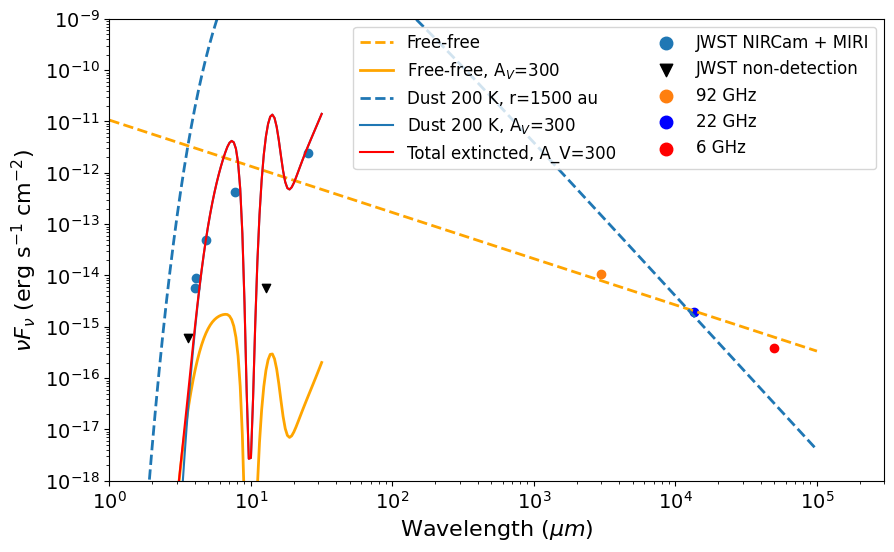

In [357]:
#Meng region 50
S_dust = thick_bb_emission(T_d, wav_to_freq(wavelength), r)

fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, ff_nuFnu * 10**(-25.45),
         label="Free-free",
         color='orange', lw=2, linestyle='--')

plt.plot(wavelengths_ext, ff_nuFnu_extincted * 10**(-25.45),
         label=f'Free-free, A$_V$={int(round(A_V))}',
         color='orange', lw=2)

plt.plot(wavelength, S_dust,
         label=rf'Dust {int(round(T_d.value))} K, r={int(round(r.value))} au',
         color='tab:blue', lw=2, linestyle='--')

plt.plot(wavelengths_ext, S_dust_extincted,
         label=rf'Dust {int(round(T_d.value))} K, A$_V$={int(round(A_V))}',
         color='tab:blue')





plt.plot(wavelengths_ext, (S_dust_extincted + ff_nuFnu_extincted*10**(-25.45)), label=f'Total extincted, A_V={A_V}', color = 'red')

plt.scatter(wavelengths[:-1], nuFnu[:-1], label = 'JWST NIRCam + MIRI')

#plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST non-detection')

plt.scatter(25.5, (((2.38730417865e-7 - 2.182466347921e-7) *u.MJy) * wav_to_freq(25.5)).to(u.erg/u.s/u.cm**2).value, color='tab:blue')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST non-detection')

# plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz')
# plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz')
plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz')
plt.scatter(freq_to_wav(22*u.GHz), (8.9*u.mJy * 22*u.GHz).to(u.erg/u.s/u.cm**2).value, label='22 GHz', color='blue')
plt.scatter(freq_to_wav(6*u.GHz), (6.4*u.mJy * 6*u.GHz).to(u.erg/u.s/u.cm**2).value, label='6 GHz', color='red')

# 360: 7.93519 MJy/sr
max_360 = (7.93519 * u.MJy / u.sr)
max_360_Jy = pixel_area_360 * max_360
plt.scatter(3.6, (max_360_Jy * wav_to_freq(3.6)).to(u.erg/u.s/u.cm**2).value, marker='v', color='k')#, label='JWST non-detection')
# min_360 = (4.51171 * u.MJy / u.sr)
# min_360_Jy = pixel_area_360 * min_360
# plt.scatter(3.6, (min_360_Jy * wav_to_freq(3.6)).to(u.erg/u.s/u.cm**2).value, marker='v', color='k', label='JWST non-detection')

# max_410 = 6.5124e+1 * u.MJy / u.sr
# max_410_Jy = pixel_area_410 * max_410
# plt.scatter(4.1, (max_410_Jy * wav_to_freq(4.1)).to(u.erg/u.s/u.cm**2).value, label='410', color='green')

# nu_arr = np.logspace(9, 14, 500) * u.Hz
# Te = 8000.0 * u.K
# ne = 13.92 * 10**4 * u.cm**-3 #meng22
# radius = 300 * u.AU      # ~0.0005 pc
# distance = 8.277 * u.kpc

# S_nu, ff_nuFnu_, tau = freefree_nuFnu(nu_arr, Te, ne, radius, distance)
# lam = (c.c / (nu_arr)).to(u.um)
# plt.plot(lam.value, ff_nuFnu_.value, lw=2)

fontsize = 14

#plt.title('X8.33 SED')


plt.legend(fontsize=12, ncol=2, markerscale=1.5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-9))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)', fontsize=fontsize+2)
plt.xlabel(r'Wavelength ($\mu m$)', fontsize=fontsize+2)
plt.tick_params(labelsize=fontsize)

plt.savefig('/orange/adamginsburg/jwst/sgrb2/NB/sgrb2_jwst/figures/X8_33_SED.png', dpi=300,)

In [49]:
x

NameError: name 'x' is not defined

Text(0.5, 0, 'Wavelength (microns)')

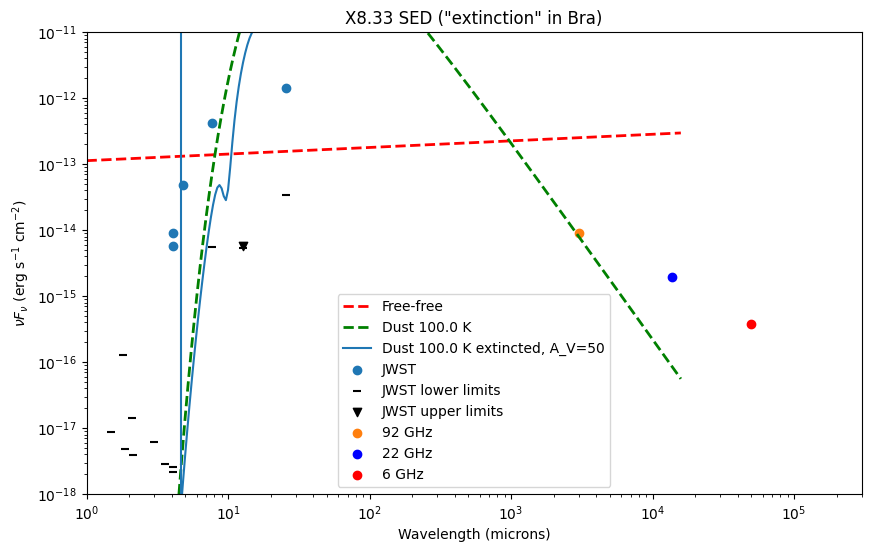

In [ ]:
#Meng region 50
S_dust = thick_bb_emission(T_d, wav_to_freq(wavelength), r)


fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.plot(wavelengths_ext, S_dust_extincted, label=f'Dust {T_d} extincted, A_V={A_V}',)
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits')

# plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz')
# plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz')
plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz')
plt.scatter(freq_to_wav(22*u.GHz), (8.9*u.mJy * 22*u.GHz).to(u.erg/u.s/u.cm**2).value, label='22 GHz', color='blue')
plt.scatter(freq_to_wav(6*u.GHz), (6.4*u.mJy * 6*u.GHz).to(u.erg/u.s/u.cm**2).value, label='6 GHz', color='red')



plt.title('X8.33 SED ("extinction" in Bra)')

plt.axvline(4.66)

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [246]:
get_SI(1.15e-2*u.Jy, 6.4e-3*u.Jy, 92*u.GHz, 6*u.GHz,)

0.2146676910237571

In [247]:
get_SI(8.9e-3*u.Jy, 6.4e-3*u.Jy, 22*u.GHz, 6*u.GHz,)

0.25379635568244174

In [252]:
get_SI(8.9e-3*u.Jy, 1.1e-2*u.Jy, 22*u.GHz, 92*u.GHz,)

0.1480653992714014

In [ ]:
x

In [ ]:
src3 = cat[(cat['id_f480m'] == 51008) & (cat['id_f405n'] == 61142)][0]
cross_match_with_src(src3)

freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src3)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

#miri_1280_hardcoded_upper = (8.610597991943e+1*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src3)[1]
#jy_upper_limits[-2] = miri_1280_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

In [ ]:
nuFnu_92ghz = (6e-5 * u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_6ghz = (2e-4*u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)

Text(0.5, 0, 'Wavelength (microns)')

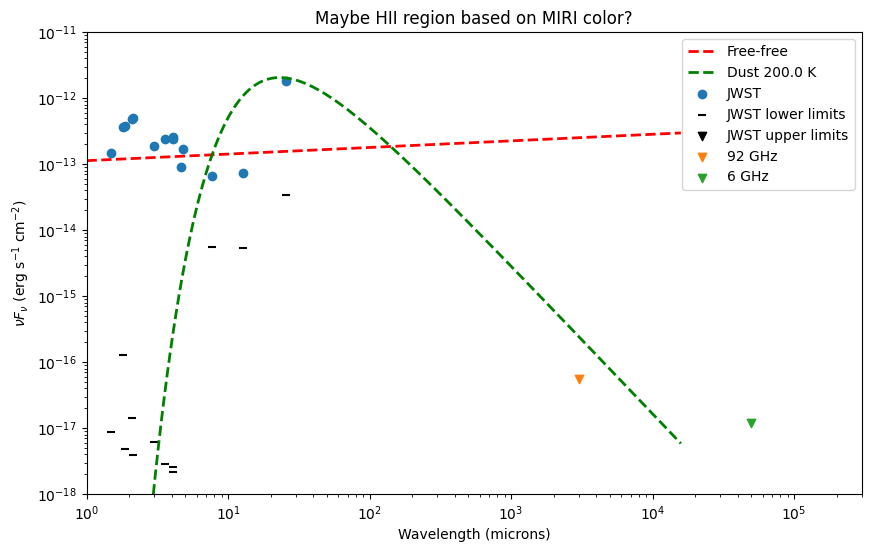

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**10, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz', marker = 'v')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz', marker = 'v')


plt.title('Maybe HII region based on MIRI color?')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [ ]:
get_jy(src4)[0] # verified that the correct source was matched in the 25um catalog

[3.1336208e-06,
 0.00010865112,
 0.00013402327,
 0.00046905273,
 0.00053465966,
 1.6119442e-05,
 0.0005184131,
 0.0019391886,
 0.00169187,
 0.00012548974,
 0.0014493094,
 0.0005384042940212139,
 7.446296246513898e-05,
 0.0021341018629170315]

In [ ]:

src4 = cat[(cat['id_f480m'] == 73468) & (cat['id_f405n'] == 87793)][0]

freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src4)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

#miri_1280_hardcoded_upper = (8.610597991943e+1*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src4)[1]
#jy_upper_limits[-2] = miri_1280_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

In [ ]:
nuFnu_92ghz = (6e-5 * u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_6ghz = (2e-4*u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)

Text(0.5, 0, 'Wavelength (microns)')

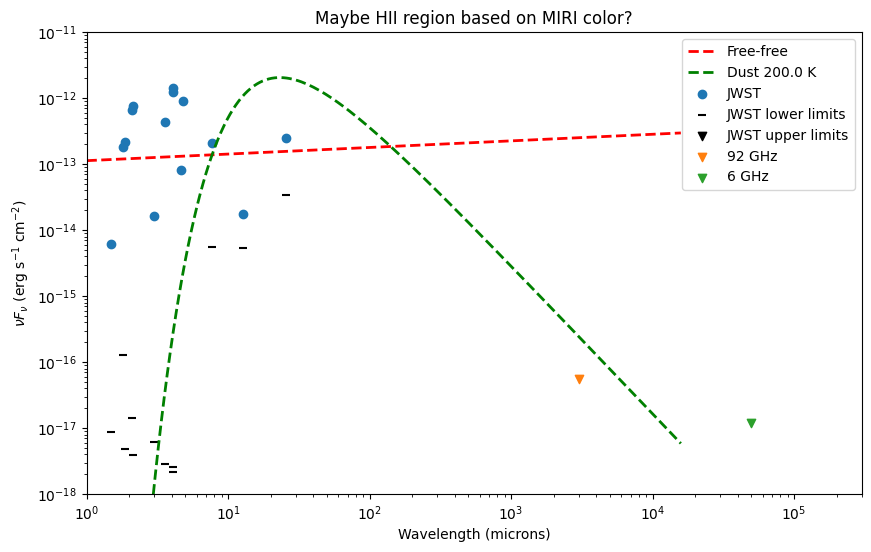

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**10, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz', marker = 'v')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz', marker = 'v')


plt.title('Maybe HII region based on MIRI color?')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [ ]:
src5 = cat[(cat['id_f480m'] == 411553) & (cat['id_f405n'] == 79331)][0]

freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src5)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

miri_1280_hardcoded_upper = (4.062288513184e+2*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
miri_2550_hardcoded_upper = (3.688127685547e+3*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src5)[1]
jy_upper_limits[-2] = miri_1280_hardcoded_upper
jy_upper_limits[-1] = miri_2550_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553
No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553
No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553
No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553


Text(0.5, 0, 'Wavelength (microns)')

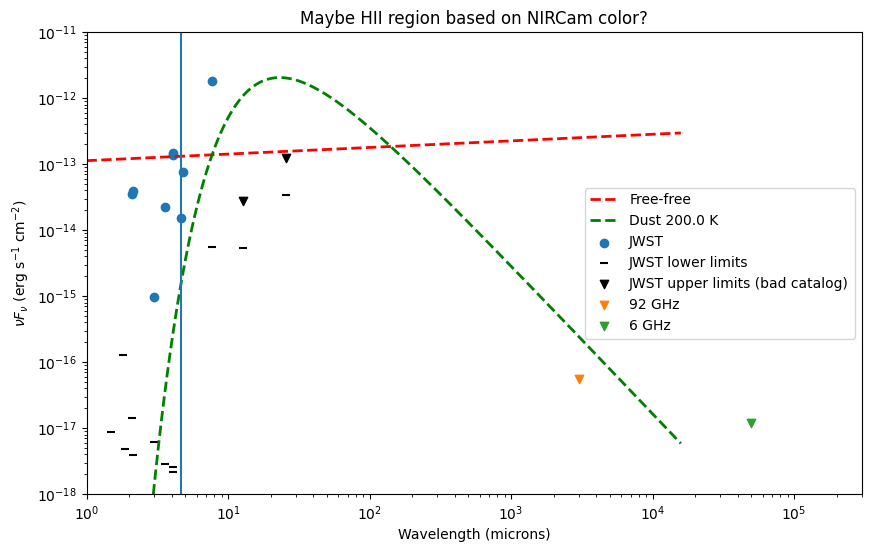

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**10, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits (bad catalog)')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz', marker = 'v')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz', marker = 'v')

plt.axvline(4.66)
plt.title('Maybe HII region based on NIRCam color?')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [ ]:

src6 = cat[(cat['id_f480m'] == 52059) & (cat['id_f405n'] == 62404)][0]

freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src6)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

miri_770_hardcoded_upper = (2.757945556641e+2 *u.MJy/u.sr * pixel_area_770).to(u.Jy).value
miri_1280_hardcoded_upper = (1.345265655518e+2*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
miri_2550_hardcoded_upper = (4.119388671875e+3*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src5)[1]
jy_upper_limits[-3] = miri_770_hardcoded_upper
jy_upper_limits[-2] = miri_1280_hardcoded_upper
jy_upper_limits[-1] = miri_2550_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

No match in F770W catalog for source 52059
No match in F1280W catalog for source 52059
No match in F2550W catalog for source 52059
No match in F770W catalog for source 52059
No match in F1280W catalog for source 52059
No match in F2550W catalog for source 52059
No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553
No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553


/blue/adamginsburg/nbudaiev/python_env/JWST_SgrB2/lib/python3.12/site-packages/astropy/units/quantity.py:544: UserWarning: Warning: converting a masked element to nan.
  value = np.array(


In [ ]:

nuFnu_92ghz = (1.241483405465e-4 * u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_6ghz = (6.637058104388e-4*u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)

Text(0.5, 0, 'Wavelength (microns)')

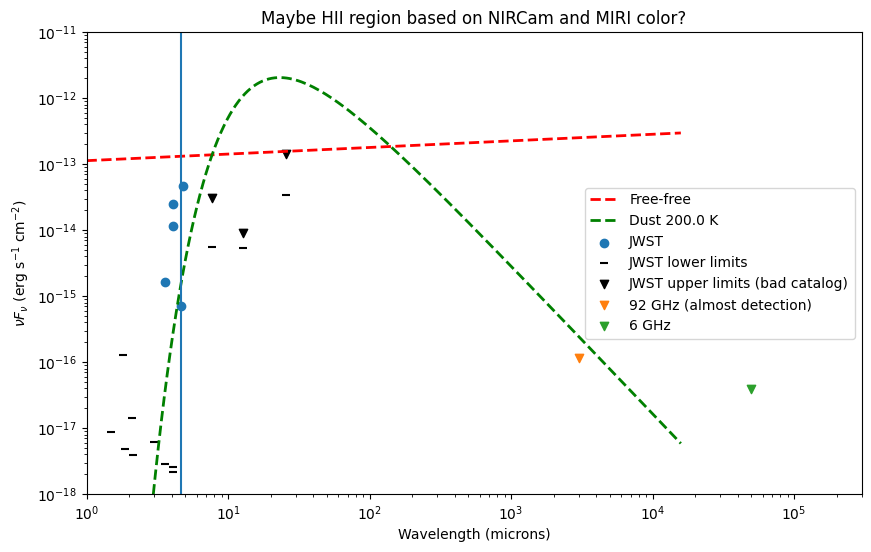

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**10, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits (bad catalog)')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz (almost detection)', marker = 'v')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz', marker = 'v')

plt.axvline(4.66)
plt.title('Maybe HII region based on NIRCam and MIRI color?')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [ ]:
# candidate HII region that is going in the paper. Near BB
src7 = cat[(cat['id_f480m'] == 224751) & (cat['id_f410m'] == 442951)][0]

freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src7)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

#miri_770_hardcoded_upper = (2.757945556641e+2 *u.MJy/u.sr * pixel_area_770).to(u.Jy).value
miri_1280_hardcoded_upper = (4e+2*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
miri_2550_hardcoded_upper = (3.7e+3*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src7)[1]
#jy_upper_limits[-3] = miri_770_hardcoded_upper
jy_upper_limits[-2] = miri_1280_hardcoded_upper
jy_upper_limits[-1] = miri_2550_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

No match in F1280W catalog for source 224751
No match in F2550W catalog for source 224751
No match in F1280W catalog for source 224751
No match in F2550W catalog for source 224751
No match in F1280W catalog for source 224751
No match in F2550W catalog for source 224751
No match in F1280W catalog for source 224751
No match in F2550W catalog for source 224751


/blue/adamginsburg/nbudaiev/python_env/JWST_SgrB2/lib/python3.12/site-packages/astropy/units/quantity.py:544: UserWarning: Warning: converting a masked element to nan.
  value = np.array(


In [ ]:
(3.885203792880e-9*u.MJy * wav_to_freq(7.7)).to(u.erg/u.s/u.cm**2)

<Quantity 1.51266856e-12 erg / (s cm2)>

In [ ]:
nuFnu_92ghz = (3.569841056273e-5 * u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_6ghz = (2.161161298677e-4 *u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)

In [ ]:
h = c.h  # Planck's constant (J s)
k = c.k_B # Boltzmann constant (J/K)
T_d = 200 * u.K      # Dust temperature in K
beta = 1.75     # Dust emissivity index
B_lambda = (2*h*c.c**2 / (wavelength*u.um)**5) / (np.exp(h*c.c / (wavelength*u.um* k * T_d) ) - 1)
S_dust = B_lambda * (wavelength)**beta

Text(0.5, 0, 'Wavelength (microns)')

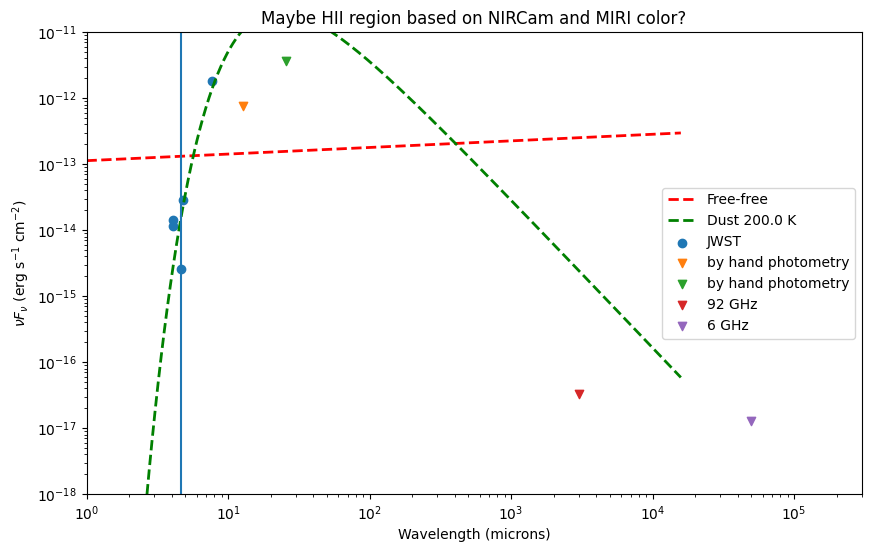

In [ ]:
# no bra excess
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**11, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

#plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

#plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits (bad catalog)')

#plt.scatter(7.7, (3.885203792880e-9*u.MJy * wav_to_freq(7.7)).to(u.erg/u.s/u.cm**2).value, label='by hand photometry', marker = 'v')
plt.scatter(12.8, (3.2e-9*u.MJy * wav_to_freq(12.8)).to(u.erg/u.s/u.cm**2).value, label='by hand photometry', marker = 'v')
plt.scatter(25.5, (3.153071598018e-8 *u.MJy * wav_to_freq(25.5)).to(u.erg/u.s/u.cm**2).value, label='by hand photometry', marker = 'v')


plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz', marker = 'v')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz', marker = 'v')

plt.axvline(4.66)
plt.title('Maybe HII region based on NIRCam and MIRI color?')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')